<a href="https://colab.research.google.com/github/harddy-bit/Titanic-Data-With-ML/blob/main/Titanic_Data_With_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd

In [3]:
titanic = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Titanic Data With ML/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis

In [4]:
print("Total Number of passengers in the training data......",len(titanic))
print("Number of passengers in the training data who survived...",len(titanic[titanic['Survived']==1]))

Total Number of passengers in the training data...... 891
Number of passengers in the training data who survived... 342


In [13]:
print("Percentage of Males survived:",100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print("Percentage of Females survived:",100*np.mean(titanic['Survived'][titanic['Sex'] == 'female']))

Percentage of Males survived: 18.890814558058924
Percentage of Females survived: 74.20382165605095


In [18]:
print('Percentage of Passengers who survived in first class:', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('Percentage of Passengers who survived in third class:', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

Percentage of Passengers who survived in first class: 62.96296296296296
Percentage of Passengers who survived in third class: 24.236252545824847


In [12]:
print('Percentage of children who survived:', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('Percentage of adults who survived:', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

Percentage of children who survived: 53.98230088495575
Percentage of adults who survived: 38.26086956521739


**Data Pre-Processing**

*Non numeric data to Numeric data*

The model requires only numeric values, but one of our features is categorical: "female" or "male". this can easily be fixed by encoding this feature: "male" = 1, "female" = 0

In [20]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x =='male' else 0)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Missing Values

In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [24]:
titanic.Embarked.fillna(value='S', axis = 0, inplace = True)

In [26]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Omit Irrelevant Columns**

In [27]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

Separate X & Y

In [28]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

**Train & Test Split**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Building the Model**

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9798657718120806
Test accuracy 0.7457627118644068


**Improve the Model**

In [48]:
model_improved = DecisionTreeClassifier(max_depth = 4)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8355704697986577
test score... 0.823728813559322


In [50]:
from sklearn.tree import export_graphviz
import graphviz

In [51]:
dot_data = export_graphviz(model_improved, out_file=None,impurity=False, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True)

In [52]:
graph = graphviz.Source(dot_data)

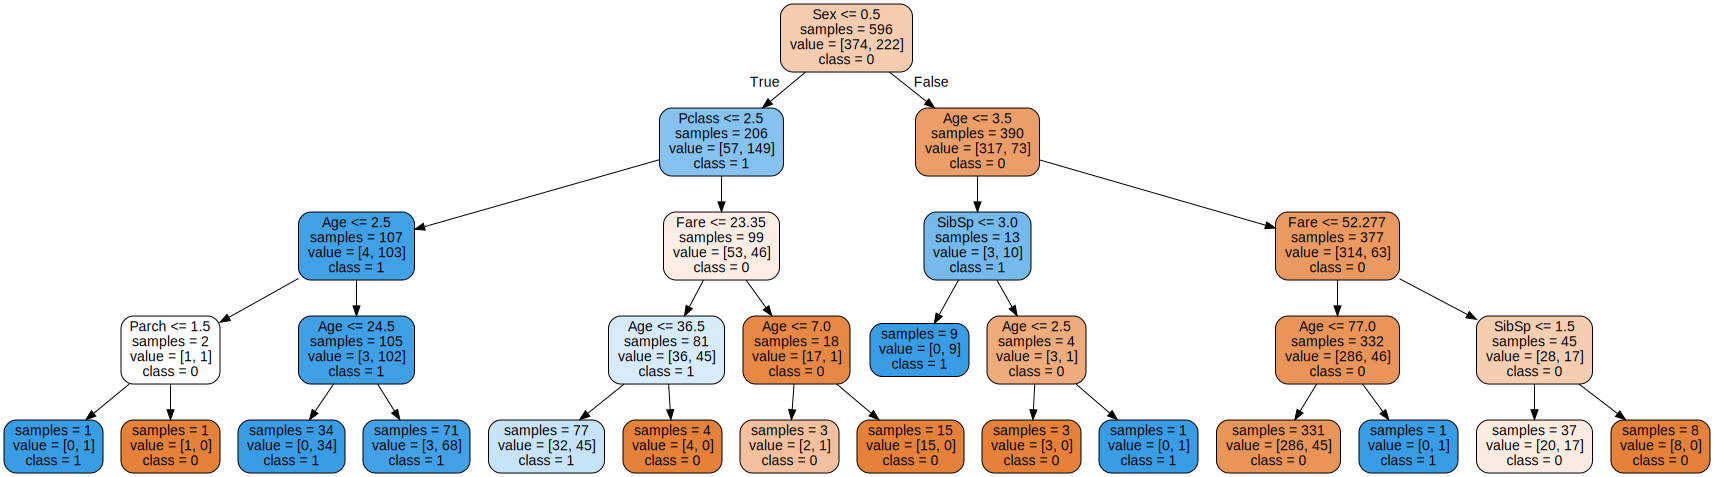

In [53]:
graph